In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings("ignore")

### Data Exploration

#### Loading dataset and then merge them into one dataframe

In [2]:
Monday_df = pd.read_csv('Monday-WorkingHours.pcap_ISCX.csv')
Tuesday_df = pd.read_csv('Tuesday-WorkingHours.pcap_ISCX.csv')
Wednesday_df = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')
Thursday1_df = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
Thursday_df = pd.read_csv('Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
Friday_df = pd.read_csv('Friday-WorkingHours-Morning.pcap_ISCX.csv')
Friday1_df = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
Friday2_df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
# Merge dataframe
Data_df = pd.concat([Monday_df, Tuesday_df, Wednesday_df, Thursday_df,Thursday1_df ,Friday_df, Friday1_df, Friday2_df])
display(Data_df.head(10))


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,49486,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,49486,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,49486,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,88,609,7,4,484,414,233,0,69.142857,111.967895,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,88,879,9,4,656,3064,313,0,72.888889,136.153814,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
Data_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


#### Count null values and printing the data type of each column

In [4]:
print('Printing 10 last row\n')
display(Data_df.tail(10))
counts = Data_df.isnull().sum() #count the number of null values in each column
print(counts)
print(Data_df.dtypes)

Printing 10 last row



,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
225735,61301,28,1,1,6,6,6,6,6.0,0.0000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225736,38130,45,1,1,0,0,0,0,0.0,0.0000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225737,10398,4,2,0,248,0,242,6,124.0,166.8772,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225738,61376,44,1,1,6,6,6,6,6.0,0.0000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225739,61377,26,1,1,6,6,6,6,6.0,0.0000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225740,61374,61,1,1,6,6,6,6,6.0,0.0000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225744,61326,68,1,1,6,6,6,6,6.0,0.0000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64
 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 79, dtype: object


#### Basic statistic of the dataset

In [5]:
display(Data_df.info())
display(Data_df.describe()) # return the basic statistic of the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

None

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


#### Correlation matrix

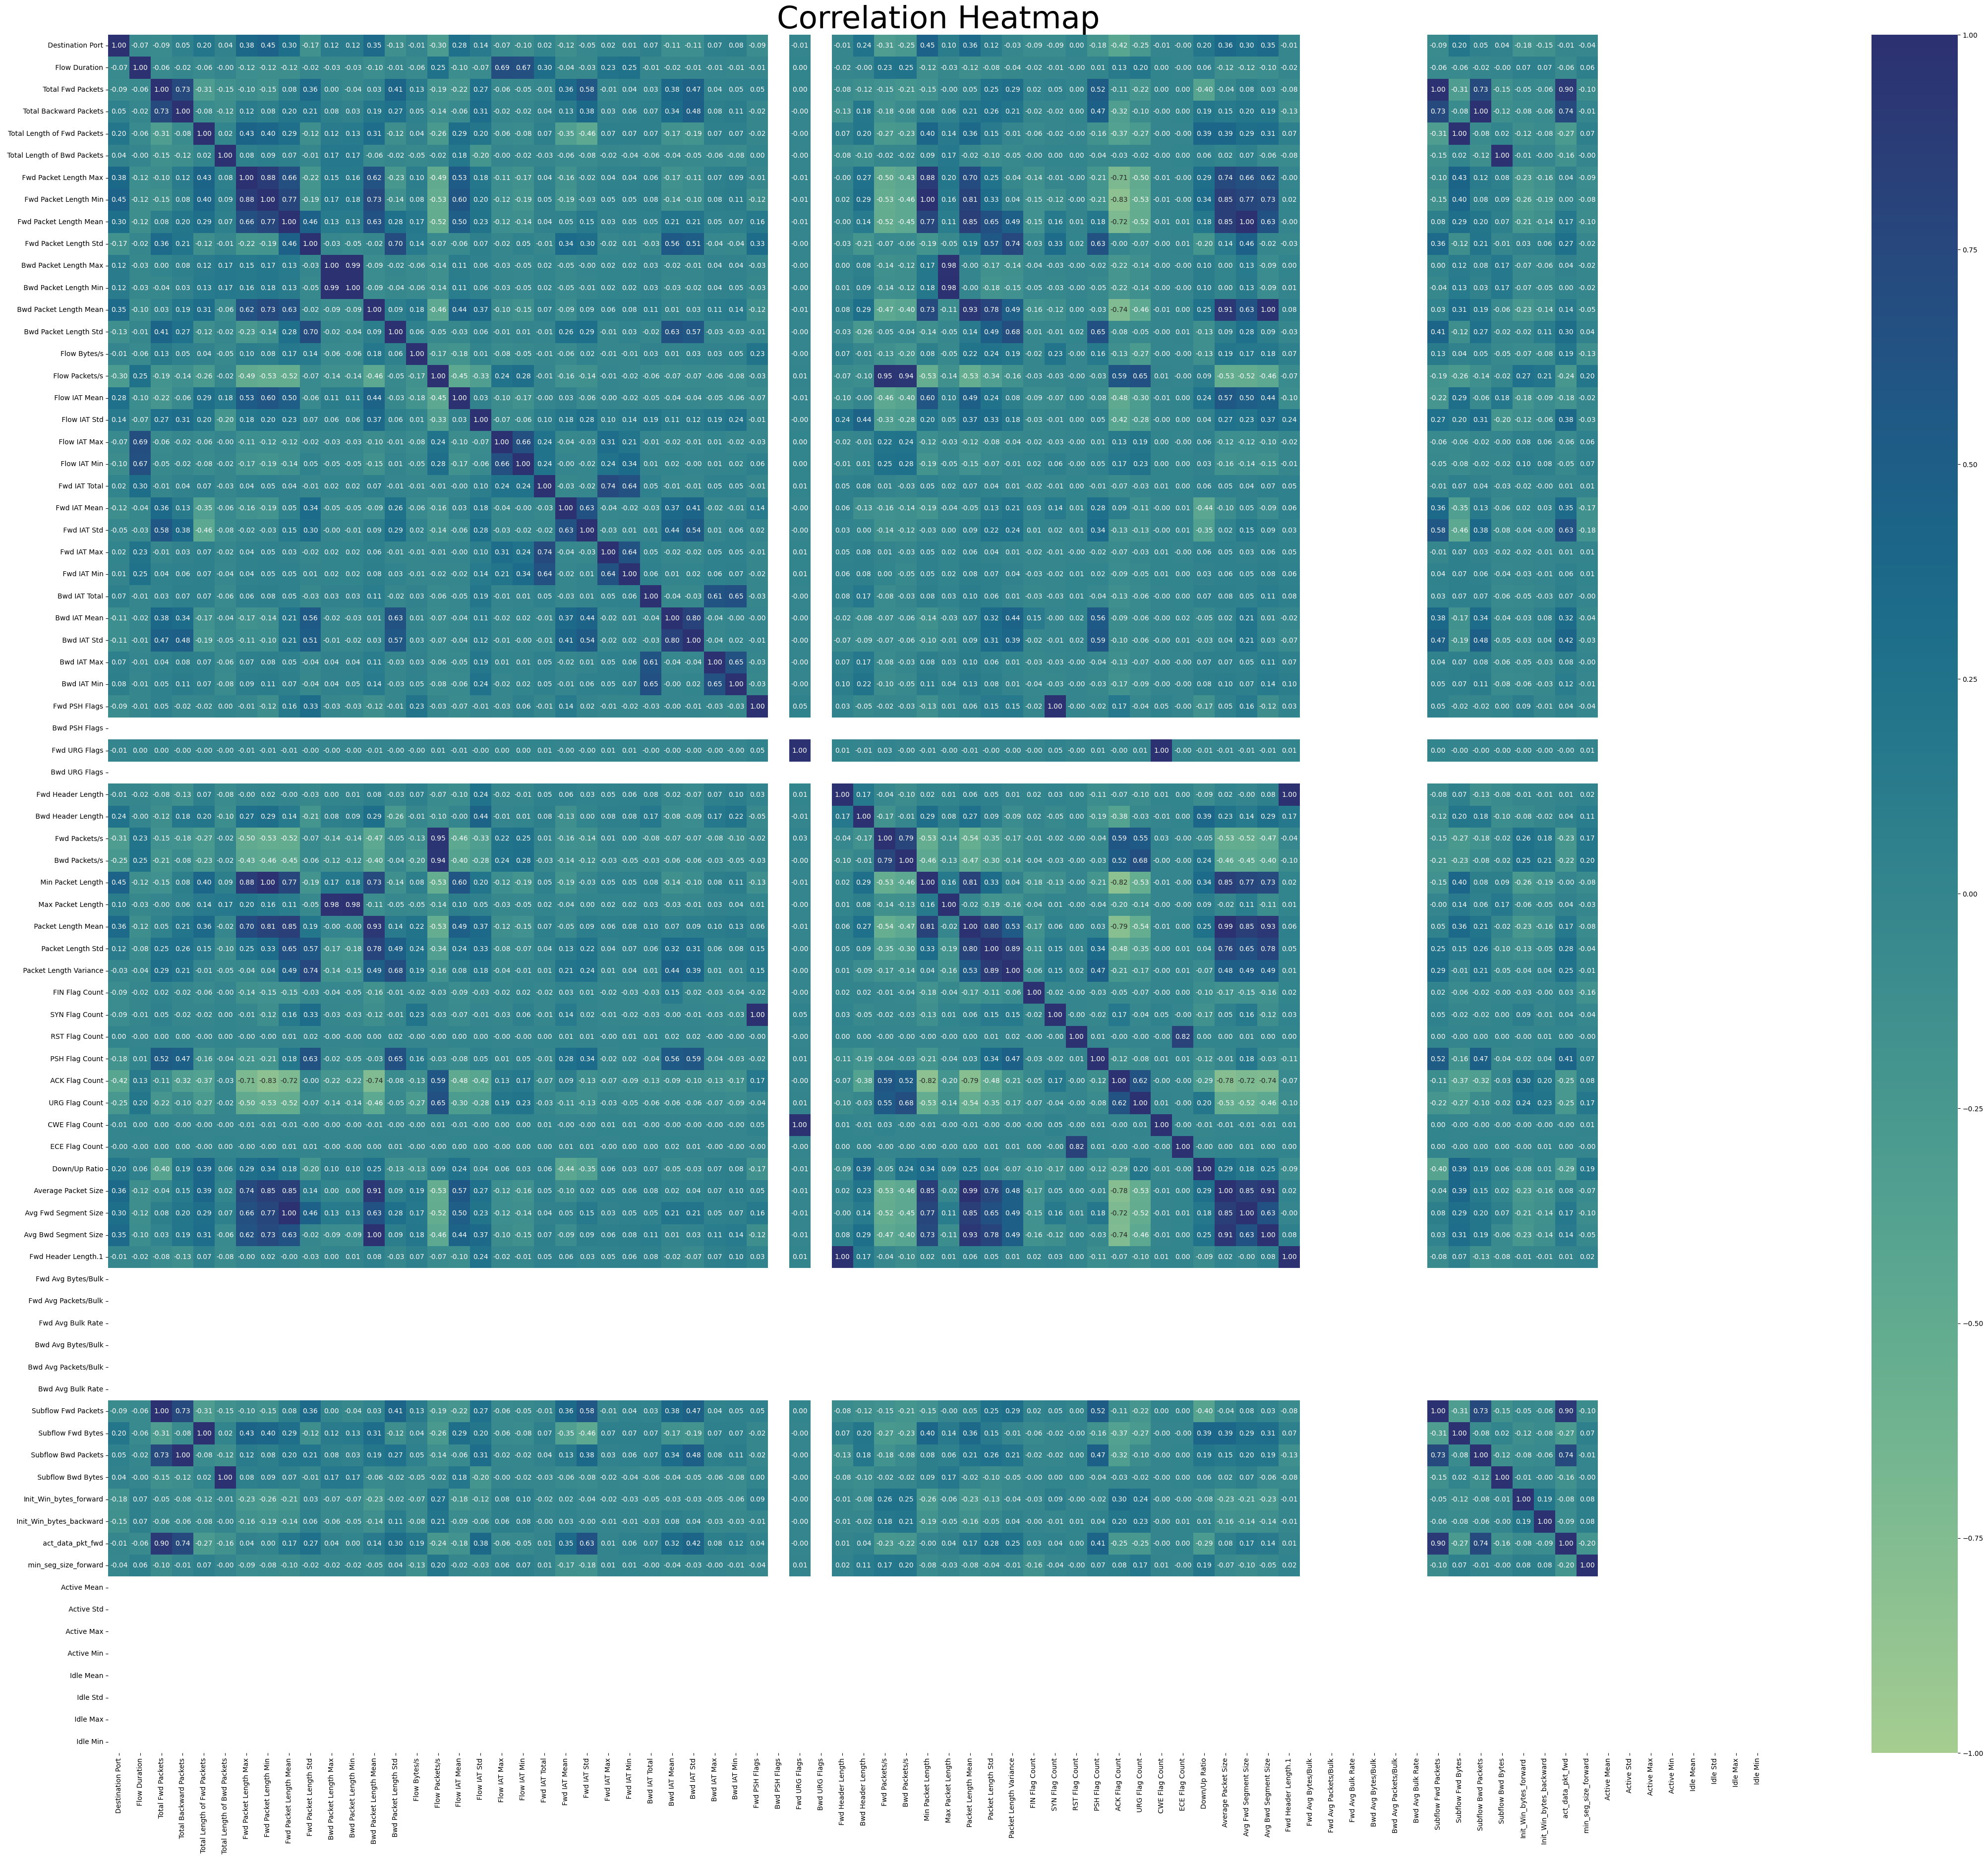

In [42]:
X_ind = Data_df.drop(' Label', axis=1)
y_dep = Data_df[' Label']
df = pd.DataFrame(X_ind) 

plt.figure(figsize=(54, 45))
sns.heatmap(df.corr(), annot=True, cmap="crest",fmt='.2f',  vmin = -1, vmax = 1)
plt.title("Correlation Heatmap",  fontsize=45)
plt.show()

#### Examine Label Distribution

 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


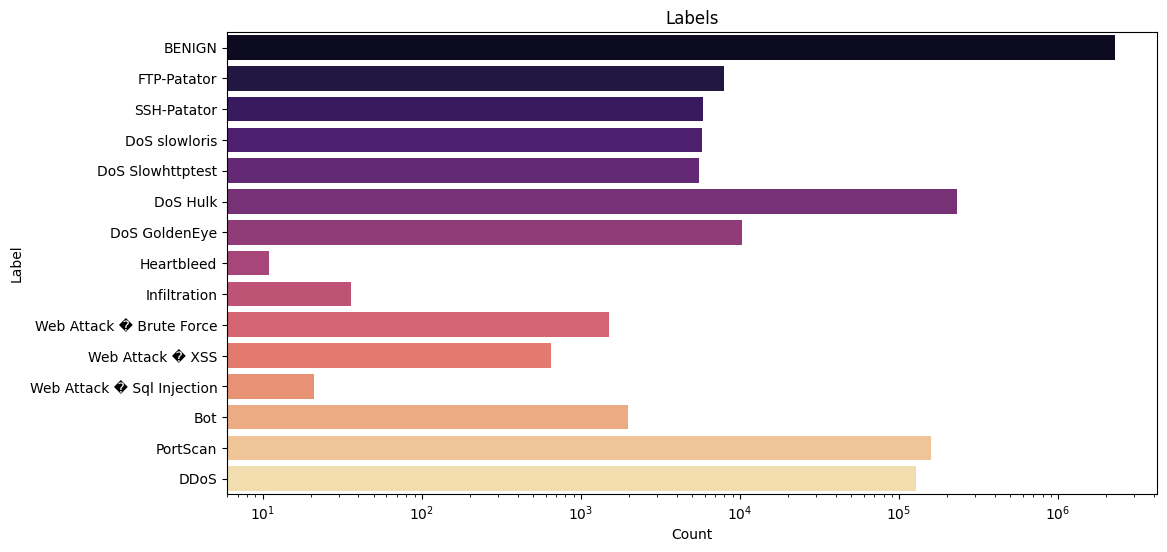

In [7]:
label_counts = Data_df[' Label'].value_counts() # count the number of occurrences of each label
print(label_counts)

plt.figure(figsize=(12, 6))
plot = sns.countplot(data=Data_df, y=' Label', palette='magma')
plt.xscale('log')
plt.title('Labels')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

#### Explore correlations between predictors with scatter plots and sns.lmplot() where necessary

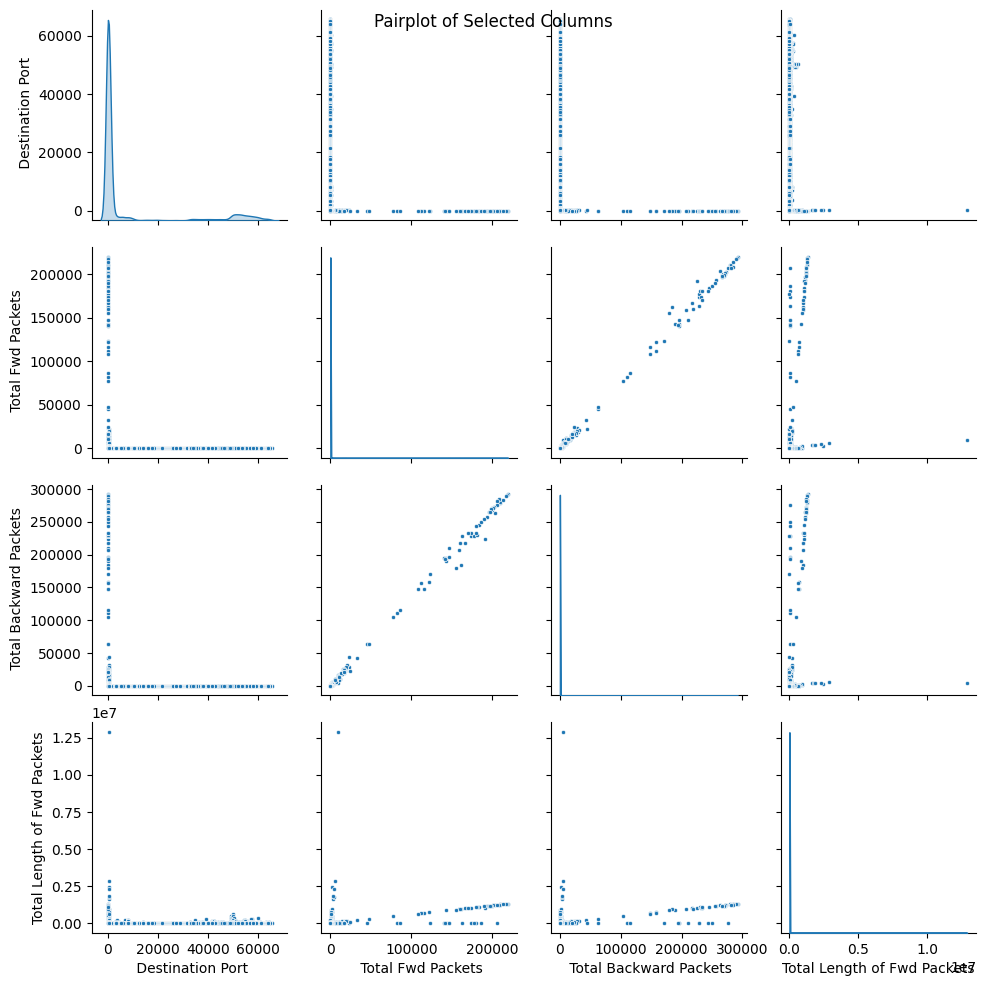

In [11]:
# Select a subset of columns for analysis
Features = [' Destination Port',  ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets']

# Subset the dataframe with selected columns
Features_df = Data_df[Features]
sns.pairplot(Features_df, hue= None, markers='.', diag_kind='kde')
plt.suptitle('Pairplot of Selected Columns')
plt.show()

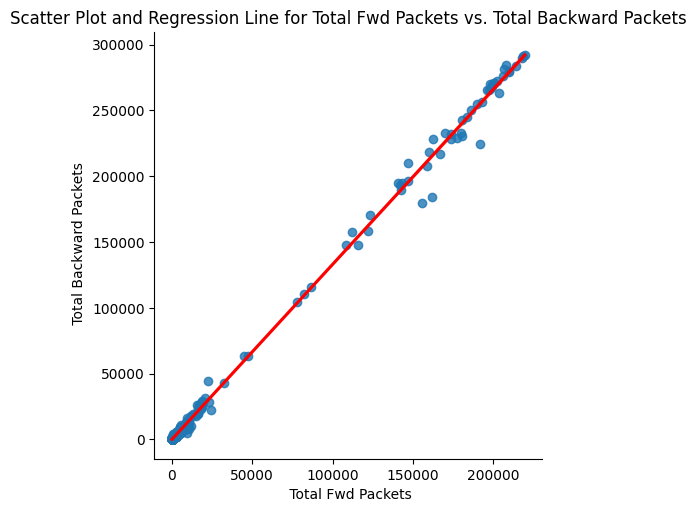

In [12]:
# Correlation between Total Fwd Packets and Total Backward Packets 
sns.lmplot(x=' Total Fwd Packets', y=' Total Backward Packets', data=Features_df,  line_kws={'color': 'red'})
plt.title('Scatter Plot and Regression Line for Total Fwd Packets vs. Total Backward Packets')
plt.show()


#### Visualize attacks counts based on day of the week.

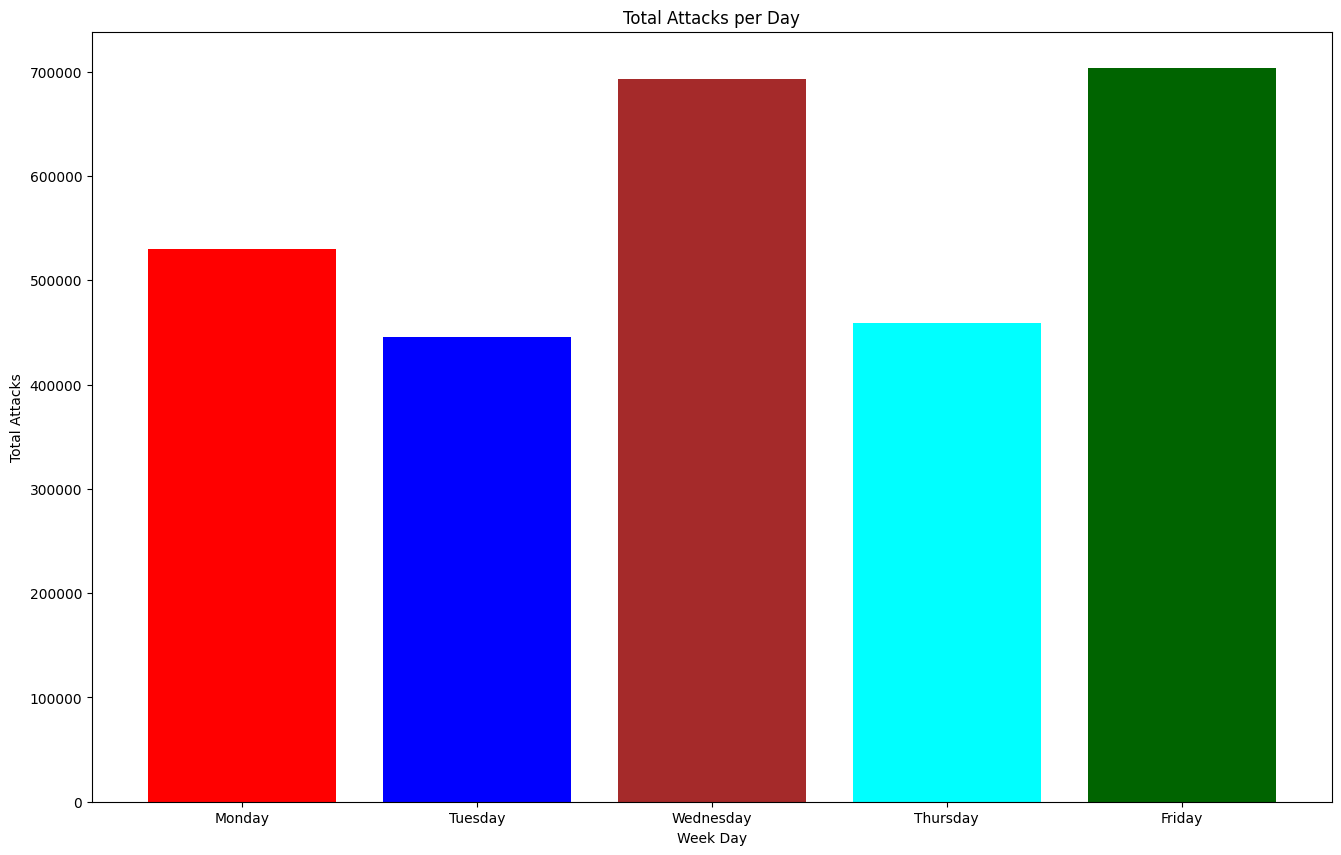

Total Attacks on Monday: 529918
Total Attacks on Tuesday: 445909
Total Attacks on Wednesday: 692703
Total Attacks on Thursday: 458968
Total Attacks on Friday: 703245


In [13]:
Thursday_merge = pd.concat([Thursday_df,Thursday1_df])

Fridays_merge = pd.concat([Friday_df, Friday1_df, Friday2_df])
data = [Monday_df, Tuesday_df, Wednesday_df, Thursday_merge, Fridays_merge]

plt.figure(figsize=(16, 10))

attacks_pday = []

colors = {'Monday_df': 'red', 'Tuesday_df': 'blue', 'Wednesday_df': 'brown', 'Thursday_merge': 'cyan', 'Fridays_merge': 'darkgreen'}

for day in data:
    day.columns = day.columns.str.strip()
    total_attacks = day['Label'].count()
    attacks_pday.append(total_attacks)

    
plt.bar(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], attacks_pday, color=[colors[day] for day in colors])

plt.title('Total Attacks per Day')
plt.xlabel('Week Day')
plt.ylabel('Total Attacks')
plt.show()

# Print total attacks for each day
for day, total_attacks in zip(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], attacks_pday):
    print(f'Total Attacks on {day}: {total_attacks}')


In [14]:
display(Data_df.columns) # display the column names

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [15]:
Data_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### Q3 Perform pre-processing on the data using scaling and label encoding as appropriate

#### Handle Missing Value

In [16]:
missing_values = Data_df.isnull().sum()
display( missing_values)

Data_df = Data_df.dropna()


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

#### Handle of duplicate rows

In [17]:
Data_df = Data_df.drop_duplicates()  # drop duplicate rows
print(Data_df.shape)

(2522009, 79)


#### Converting Data type

In [18]:
# Convert int64 columns to int8
int_columns = Data_df.select_dtypes(include='int64').columns
Data_df[int_columns] = Data_df[int_columns].astype('int8')

# Convert float64 columns to float16
float_columns = Data_df.select_dtypes(include='float64').columns
Data_df[float_columns] = Data_df[float_columns].astype('float16')


In [35]:
Data_df.dtypes   # printing datatype

 Destination Port                 int8
 Flow Duration                    int8
 Total Fwd Packets                int8
 Total Backward Packets           int8
Total Length of Fwd Packets       int8
                                ...   
Idle Mean                      float16
 Idle Std                      float16
 Idle Max                         int8
 Idle Min                         int8
 Label                          object
Length: 79, dtype: object

####  Scaling and label encoder

In [20]:
# Extracting the independent and dependent variables
Data_df.replace([np.inf, -np.inf], np.nan, inplace=True)
Data_df.dropna(inplace=True)

X = Data_df.drop(' Label', axis=1)
y = Data_df[' Label']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y[:len(X_scaled)], test_size=0.2, random_state=40)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)


### Q4. Create models based on three different machine learning algorithms and compare their performance.

#### Random Forest

In [24]:
# Initialize the random forest classifier
random_forest = RandomForestClassifier()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Calculate class weights
class_weights = 'balanced'  # You can also use 'balanced_subsample'

# Initialize the random forest classifier with class weights
random_forest = RandomForestClassifier(class_weight=class_weights)

# Fit the model on the training set
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Calculate the specified metrics
avg_recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
avg_precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
avg_f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Display results
print("\nRandom Forest Classifier:")
print(f"Average Recall: {avg_recall_rf}")
print(f"Average Precision: {avg_precision_rf}")
print(f"Average F1-score: {avg_f1_rf}")



Random Forest Classifier:
Average Recall: 0.9982705637548748
Average Precision: 0.9982199564605169
Average F1-score: 0.9982336017003473


#### Logistic Regression

In [25]:
logistic_regression = LogisticRegression()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_weights = 'balanced'  

# Initialize the random forest classifier with class weights
logistic_regression = LogisticRegression(class_weight=class_weights)


# Fit the model on the training set
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_regression.predict(X_test)

# Calculate the specified metrics
avg_recall_lr = recall_score(y_test, y_pred_lr, average = 'weighted')
avg_precision_lr = precision_score(y_test, y_pred_lr, average = 'weighted')
avg_f1_lr = f1_score(y_test, y_pred_lr, average = 'weighted')

# Display results
print("\nLogistic Regression Classifier:")
print(f"Average Recall: {avg_recall_lr}")
print(f"Average Precision: {avg_precision_lr}")
print(f"Average F1-score: {avg_f1_lr}")



Logistic Regression Classifier:
Average Recall: 0.6936555183485608
Average Precision: 0.9772215928941822
Average F1-score: 0.8059028973611762


#### Decision Tree

In [26]:
# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_weights = 'balanced'  

# Initialize the random forest classifier with class weights
decision_tree = DecisionTreeClassifier(class_weight=class_weights)

# Fit the model on the training set
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Calculate the specified metrics
avg_recall_dt = recall_score(y_test, y_pred_dt, average='weighted')  
avg_precision_dt = precision_score(y_test, y_pred_dt,  average='weighted') 
avg_f1_dt = f1_score(y_test, y_pred_dt, average='weighted')  

# Display results
print("\nDecision Tree Classifier:")
print(f"Average Recall: {avg_recall_dt}")
print(f"Average Precision: {avg_precision_dt}")
print(f"Average F1-score: {avg_f1_dt}")



Decision Tree Classifier:
Average Recall: 0.9989733625477145
Average Precision: 0.9989868395656426
Average F1-score: 0.9989773800203026


#### Visualization of performance of different Classiffication models

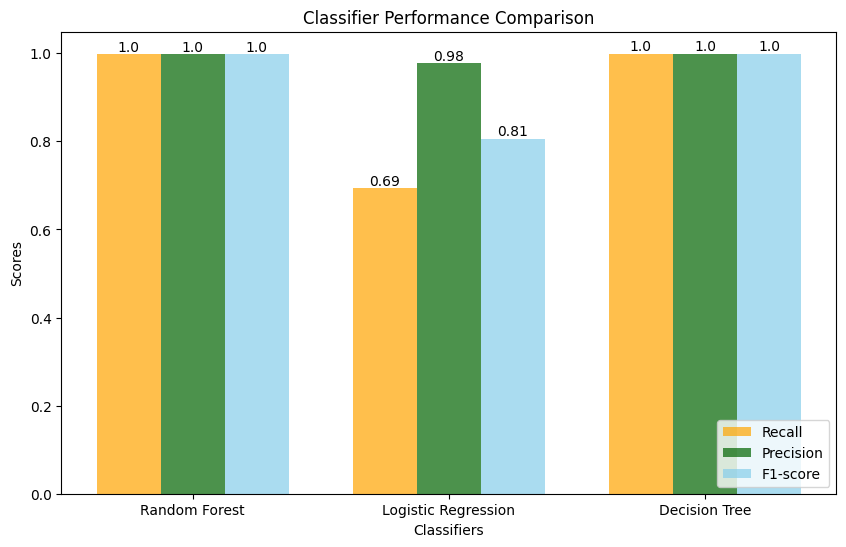

In [27]:
# Visualization
classifier_names = ["Random Forest", "Logistic Regression", "Decision Tree"]
avg_recalls = [avg_recall_rf, avg_recall_lr, avg_recall_dt]
avg_precisions = [avg_precision_rf, avg_precision_lr, avg_precision_dt]
avg_f1_scores = [avg_f1_rf, avg_f1_lr, avg_f1_dt]

plt.figure(figsize=(10, 6))
bar_width = 0.25

bar1 = plt.bar([i - bar_width for i in range(len(classifier_names))], avg_recalls, width=bar_width, label='Recall', alpha=0.7, color = 'orange')
bar2 = plt.bar([i for i in range(len(classifier_names))], avg_precisions, width=bar_width, label='Precision', alpha=0.7, color = 'darkgreen')
bar3 = plt.bar([i + bar_width for i in range(len(classifier_names))], avg_f1_scores, width=bar_width, label='F1-score', alpha=0.7,  color = 'skyblue')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Classifier Performance Comparison')
plt.xticks([i for i in range(len(classifier_names))], classifier_names)
plt.legend(loc = 'lower right')

# Annotate the bars with scores
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


##### Comparing the performance of three classification model (Random forest, Rogistic Regression, Decision tree) using three metric Recall,        Precision, F1-score.

I have trained the model each individually  using Train test split where  the  test data were 20% and rest 80% by training set. due to class imbalance between predictor where it is Benign has more data than  than others which can impact the perfomance by training on imbalance class. I have used class weights to balance the data. I have also used random state to get same result for each time I run the code. I have also used weighted average to calculate the scores.


The output shows that for
Random Forest Classifier: Recall: 0.9983, Precision: 0.9982, F1-score: 0.99823
Logistic Regression Classifier: Recall: 0.6936 Precision: 0.9772, F1-score: 0.8059
Decision Tree Classifier: Recall: 0.9989, Precision: 0.9989, F1-score: 0.9989

This result show the Random Forest classifier exhibited exceptional performance across all metrics, showcasing robustness and accuracy This makes it particularly well-suited for intrusion detection tasks, where the timely and accurate identification of potential threats is paramount
Despite displaying high precision, the Logistic Regression model faced challenges in recall, leading to a comparatively lower F1-score. In the context of intrusion detection, where the focus is on identifying actual threats recall, this model might have limitations. However, in other contexts, such as monitoring, where the goal is to detect anomalous behavior precision, the
Logistic Regression model may be employeed for that purpose.

For decision Tree the metric shows the result which is nearly close to that of Random Forest classifier which means for detecting intrusion, decision tree also can be trusted to deliver the desired output.

inconclusion intrusion detection system is an important tools of defense that help in detecting the attacks that could 

Recommendation
To enhance the models further, addressing class imbalance through advanced sampling techniques and fine-tuning hyperparameters could be considered. 

In [47]:
Data_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
29,80,-61,3,4,103,-65,97,0,34.343750,54.343750,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
122,-123,37,5,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
123,-60,123,5,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
125,-123,100,17,8,28,-54,64,0,16.703125,25.265625,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
197,-117,-103,49,30,-72,54,-62,0,50.781250,66.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225727,-10,64,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225728,-98,79,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225729,14,-34,2,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225730,12,-38,2,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### Q5 Apply feature selection approaches on the dataset and build ML models for the same algorithms

####  Random forest classifier with PCA

In [28]:
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Perform PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_selected)

print(f"Explained Variance Ratio: {sum(pca.explained_variance_ratio_):.2f}")

# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the random forest classifier
random_forest = RandomForestClassifier()

# Fit the model on the training set
random_forest.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test_pca)

# Calculate the specified metrics
recall_rf = recall_score(y_test, y_pred_rf, average= 'weighted')
precision_rf = precision_score(y_test, y_pred_rf, average = 'weighted')
f1_rf = f1_score(y_test, y_pred_rf, average= 'weighted')

# Display results
print("\nRandom Forest Classifier with PCA:")
print(f"Average Recall: {recall_rf}")
print(f"Average Precision: {precision_rf}")
print(f"Average F1-score: {f1_rf}")



Explained Variance Ratio: 1.0000

Random Forest Classifier with PCA:
Average Recall: 0.9879146168368542
Average Precision: 0.987583906329315
Average F1-score: 0.9862748736332813


#### Logistic Regression with PCA

In [29]:
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Perform PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_selected)

print(f"Explained Variance Ratio: {sum(pca.explained_variance_ratio_):.2f}")

# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the logistic regression classifier
logistic_regression = LogisticRegression()

# Fit the model on the training set
logistic_regression.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_lr = logistic_regression.predict(X_test_pca)

# Calculate the specified metrics
recall_lr = recall_score(y_test, y_pred_lr, average = 'weighted')
precision_lr = precision_score(y_test, y_pred_lr, average = 'weighted')
f1_lr = f1_score(y_test, y_pred_lr, average = 'weighted')

# Display results
print("\nLogistic Regression Classifier with PCA:")
print(f"Average Recall: {recall_lr}")
print(f"Average Precision: {precision_lr}")
print(f"Average F1-score: {f1_lr}")


Explained Variance Ratio: 1.0000

Logistic Regression Classifier with PCA:
Average Recall: 0.9370237160141662
Average Precision: 0.956467568130246
Average F1-score: 0.9445321477848511


#### Decision Tree 

In [30]:
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Perform PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_selected)

print(f"Explained Variance Ratio: {sum(pca.explained_variance_ratio_):.4f}")

# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Fit the model on the training set
decision_tree.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test_pca)

# Calculate the specified metrics
recall_dt = recall_score(y_test, y_pred_dt, average = 'weighted')
precision_dt = precision_score(y_test, y_pred_dt, average = 'weighted')
f1_dt = f1_score(y_test, y_pred_dt, average = 'weighted')

# Display results
print("\nDecision Tree Classifier with PCA:")
print(f"Average Recall: {recall_dt}")
print(f"Average Precision: {precision_dt}")
print(f"Average F1-score: {f1_dt}")


Explained Variance Ratio: 1.0000

Decision Tree Classifier with PCA:
Average Recall: 0.987873275731393
Average Precision: 0.9875008714418454
Average F1-score: 0.9862265923591027


#### Visualization of the Classification Model using Performance metric

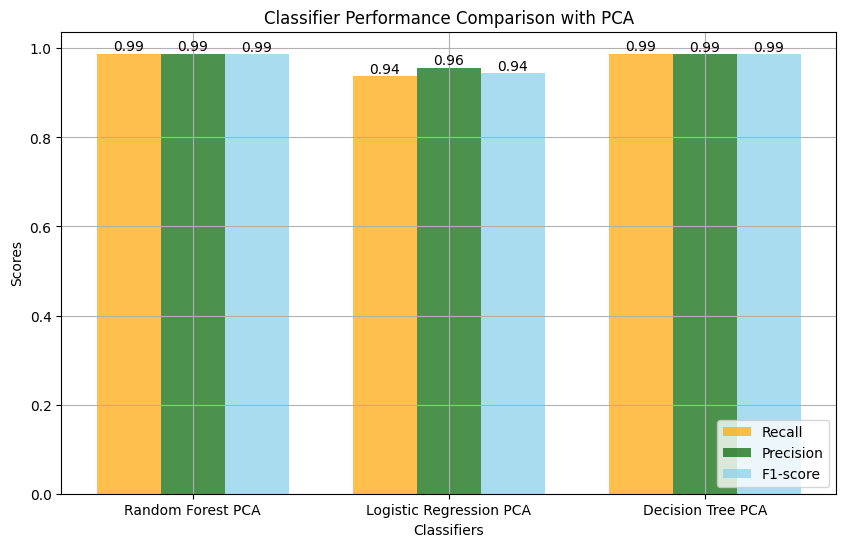

In [37]:

# Visualization
classifier_names = ["Random Forest PCA", "Logistic Regression PCA", "Decision Tree PCA"]
avg_recalls = [recall_rf, recall_lr, recall_dt]
avg_precisions = [precision_rf, precision_lr, precision_dt]
avg_f1_scores = [f1_rf, f1_lr, f1_dt]

plt.figure(figsize=(10, 6))
bar_width = 0.25

bar1 = plt.bar([i - bar_width for i in range(len(classifier_names))], avg_recalls, width=bar_width, label='Recall', alpha=0.7, color  = 'orange')
bar2 = plt.bar([i for i in range(len(classifier_names))], avg_precisions, width=bar_width, label='Precision', alpha=0.7, color = 'darkgreen')
bar3 = plt.bar([i + bar_width for i in range(len(classifier_names))], avg_f1_scores, width=bar_width, label='F1-score', alpha=0.7, color = 'skyblue')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Classifier Performance Comparison with PCA')
plt.xticks([i for i in range(len(classifier_names))], classifier_names)
plt.legend(loc = 'lower right')

# Annotate the bars with scores
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.grid()
plt.show()
